In [1]:
# Creates Initial connection to data base
import sqlite3
import pandas as pd

# Connect to an existing database or create a new one
conn = sqlite3.connect('/Users/Marcy_Student/Desktop/Mod3_Kevin/data/themepark.db')
cursor = conn.cursor()

In [ ]:
# write query for first figure
query = '''
WITH daily_performance AS (
  SELECT 
    d.day_name, 
    SUBSTR(d.day_name,1,3) AS initals, -- Added just to use in charts
    COUNT(v.visit_id) AS daily_visits,
    ROUND(SUM(v.spend_dollars),2) AS daily_spent
  FROM fact_visits v
  INNER JOIN dim_date d ON v.date_id = d.date_id
  WHERE spend_dollars IS NOT NULL
  GROUP BY d.day_name
)
SELECT 
  *
FROM daily_performance
ORDER BY daily_spent DESC, daily_visits DESC
'''
# Saves as dataframe 
daily_perf = pd.read_sql_query(query, conn)
daily_perf.head(10)

,day_name,initals,daily_visits,daily_spent
0,Sunday,Sun,6,1128.43
1,Monday,Mon,8,910.93
2,Saturday,Sat,6,900.91
3,Friday,Fri,6,555.41
4,Wednesday,Wed,5,507.12
5,Thursday,Thu,4,422.10
6,Tuesday,Tue,2,223.26


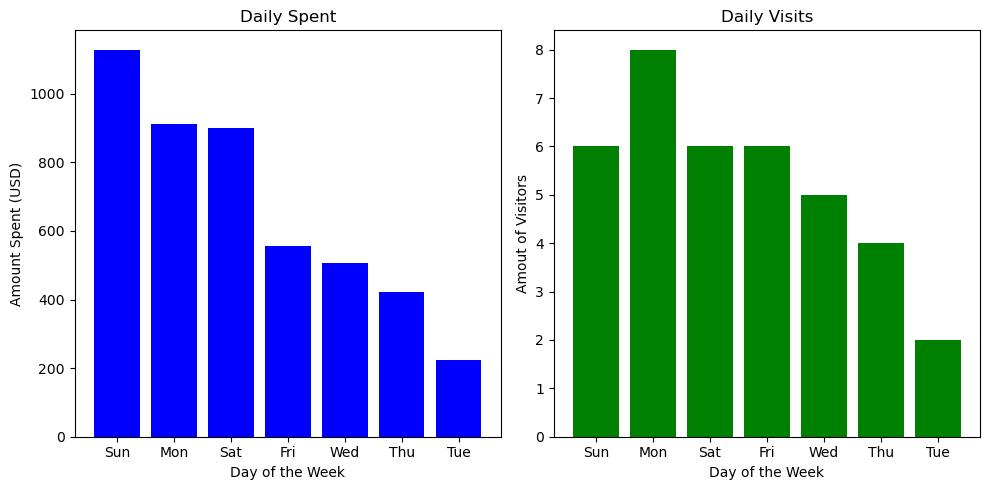

In [ ]:
# Necessary imports
import matplotlib.pyplot as plt
import numpy as np

# defines the categories and values
cats = daily_perf['initals']
val1 = daily_perf['daily_spent']
val2 = daily_perf['daily_visits']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Creates two bar graphs side by side

# First dataset
axes[0].bar(cats, val1, color='blue')
axes[0].set_title("Daily Spent")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Amount Spent (USD)")

# Second dataset
axes[1].bar(cats, val2, color='green')
axes[1].set_title("Daily Visits")
axes[1].set_xlabel("Day of the Week")
axes[1].set_ylabel("Amout of Visitors")

plt.tight_layout()
# Saves as daily_attendance.png
plt.savefig("/Users/Marcy_Student/Desktop/Mod3_Kevin/figures/daily_attendance.png",bbox_inches="tight")



In [ ]:
# Figure 2

query2 = '''
WITH event_category AS (
  SELECT *
  FROM fact_ride_events fe
  INNER JOIN dim_attraction a ON fe.attraction_id=a.attraction_id
  WHERE wait_minutes IS NOT NULL
)
SELECT 
  attraction_name,
  SUM(CASE WHEN satisfaction_category = 'UNSATISFIED' THEN 1 ELSE 0 END) AS count_of_unsatisfied,
  SUM(CASE WHEN satisfaction_category = 'SATISFIED' THEN 1 ELSE 0 END) AS count_of_satisfied,
  SUM(CASE WHEN wait_category = 'Short Wait' THEN 1 ELSE 0 END) AS count_of_short_wait,
  SUM(CASE WHEN wait_category = 'Medium Wait' THEN 1 ELSE 0 END) AS count_of_medium_wait,
  SUM(CASE WHEN wait_category = 'Long Wait' THEN 1 ELSE 0 END) AS count_of_longwait
FROM event_category
GROUP BY attraction_name
ORDER BY attraction_name
'''
# saves as data frame
eventsCat = pd.read_sql_query(query2, conn)
eventsCat.head(6)


,attraction_name,count_of_unsatisfied,count_of_satisfied,count_of_short_wait,count_of_medium_wait,count_of_longwait
0,Dragon Drop,5,3,1,3,4
1,Galaxy coaster,7,5,3,6,3
2,Pirate Splash,10,8,4,7,7
3,Space Theater,6,3,5,1,3
4,Tiny Trucks,7,8,4,10,1
5,Wild Rapids,6,2,2,4,2


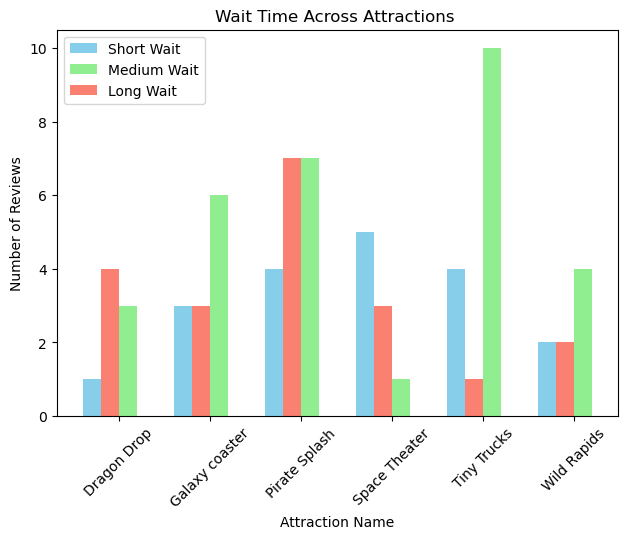

<Figure size 640x480 with 0 Axes>

In [ ]:
# Defines x and y values
categories =  eventsCat['attraction_name']
values1= eventsCat['count_of_short_wait']
values2= eventsCat['count_of_medium_wait']
values3= eventsCat['count_of_longwait']

# Width of each bar
bar_width = 0.2

# Positions for the bars on the x-axis
x = np.arange(len(categories))

# Plotting the grouped bars
plt.bar(x - 1.5 * bar_width, values1, bar_width, label='Short Wait', color='skyblue')
plt.bar(x + 0.5 * bar_width, values2, bar_width, label='Medium Wait', color='lightgreen')
plt.bar(x - 0.5 * bar_width, values3, bar_width, label='Long Wait', color='salmon')

# Customizing the chart
plt.xlabel('Attraction Name')
plt.ylabel('Number of Reviews')
plt.title('Wait Time Across Attractions ')
plt.xticks(x, categories) # Set x-axis labels
plt.legend() # Display the legend
plt.tight_layout() # Adjust layout to prevent overlapping
plt.tick_params(axis='x', labelrotation=45)
# Display the chart
plt.show()

# saves as waitTimes.png
plt.savefig("/Users/Marcy_Student/Desktop/Mod3_Kevin/figures/waitTimes.png",bbox_inches="tight")



In [ ]:
# imports library to show data points
import plotly.graph_objects as go

# Average satisfaction_rating by attraction_name and by category
query3 = '''
SELECT 
  dim_attraction.attraction_name AS name,
  dim_attraction.category, 
  ROUND(AVG(fact_ride_events.satisfaction_rating),2) AS satisfaction_rating
FROM dim_attraction
INNER JOIN fact_ride_events ON dim_attraction.attraction_id = fact_ride_events.attraction_id
GROUP BY dim_attraction.attraction_name, dim_attraction.category
ORDER BY satisfaction_rating DESC
'''

# saves as data frame
avg_satis = pd.read_sql_query(query3, conn)
avg_satis.head(6)

# defines x and y values
category = avg_satis['name']
value = avg_satis['satisfaction_rating']

# defines colors that will be used in bar chart
colors = ['blue', 'blue', 'blue', 'red','red', 'red'] 

# defines figure
fig = go.Figure(data=[go.Bar(x=category, y=value, text=value, textposition='auto' , marker_color=colors)])

# addes title, x and y titles
fig.update_layout(
    title="Average Satisfaction Rating by Attraction",
    xaxis_title="Attraction Name",
    yaxis_title="Satisfaction Rating",
    title_x=0.5  # centers the title
)
plt.show()
# Saves as ratingByAttraction.png
fig.write_image("/Users/Marcy_Student/Desktop/Mod3_Kevin/figures/ratingByAttraction.png")




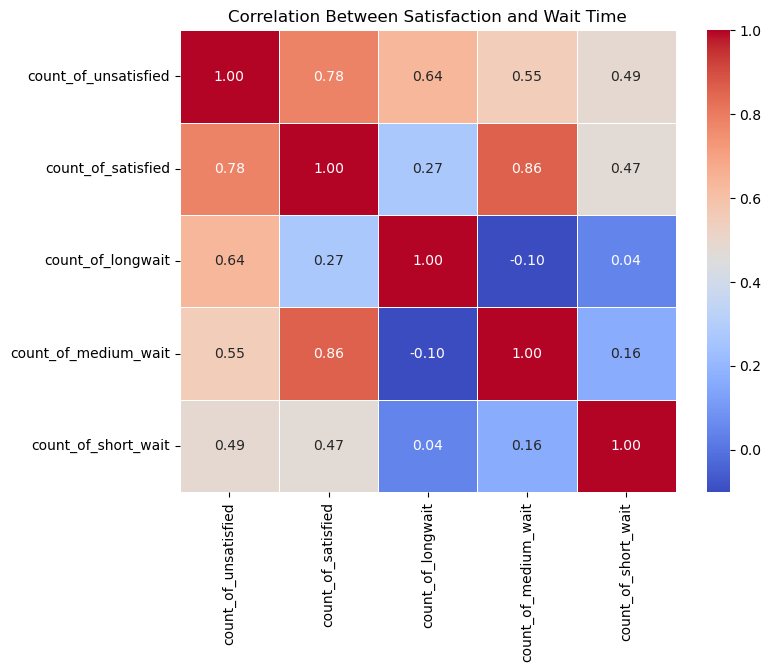

In [9]:
# Potential Graph 

import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset
selected_columns = ['count_of_unsatisfied',
                    'count_of_satisfied'
                    ,'count_of_longwait'
                    ,'count_of_medium_wait'
                    ,'count_of_short_wait']
df_selected = eventsCat[selected_columns]
# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Create the heatmap
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Satisfaction and Wait Time')
plt.show()